# 03.EDA_2 : Patterns from the past

**긴 실습이 될지도 모릅니다. 그러나 실전에서는 '빠르게' 처리되어야 할 작업입니다.**

* writer : rayleigh kim


### 이번 실습을 통해서...

과거에 있었던 사실 / 현상 / 패턴을 파악해야 합니다.
1. 가설들을 확인하기 위해 시각화를 하게 될 겁니다.
2. 시각화를 하다보면 가설이 또 생기기도 합니다.
3. 전처리 작업을 추가하게 됩니다.  
이를 반복하며 가설을 구체화 해 가는 작업을 EDA라 합니다.


### 이번 실습 전까지...

1. 어떤 가설이 사실로 확인된다면, 어떤 요인을 추가하여 실험으로 연결 / 행동으로 이어나갈지 구체적인 계획이 있어야 합니다.
2. 어떤 가설이 사실로 확인된다면, 그로 인해 어떤 부분을 개선할 수 있고, 어떤 한계가 있는지 명확히 파악하고 있어야 합니다.
3. 액션으로 연결지을 그림이 보이지 않고, 단순히 재밌어 보이는 가설은 우선순위에서 미뤄둬야 합니다.

### 이번 실습 후에

1. 요인을 추가 (우리가 제어할 수 있도록)하여 소규모로 다시 재현성을 확인해봐야 합니다. 이때 부터 본격적으로 가설검정(CDA)의 영역입니다.
2. 혹은 잠깐 1~2주를 더 지켜 볼 수도 있습니다. 과거에 찾아낸 패턴이 최근에도 '재현/반복'되는지 확인해야 할 수도 있습니다.
3. 실험이 아닌, 모델링 계획으로 넘어가야 할 수도 있습니다. 모델 디자인에 대해서는 다시 이야기 합시다.
4. 여기까지가, 전체 Data-Driven Decision Making 프로세스 중, EDA에 해당되는 부분입니다.

## 데이터 로딩

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
temp2 = pd.read_csv(r'C:\Users\50008313\Python_Jupyter_Study\2기교육\5_데이터전처리와_EDA\샘플데이터\ade_temp2.csv', engine = 'python')

In [154]:
temp2.shape

(31, 25)

In [155]:
temp2.head()

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,dayname,lemon_amt,orange_amt,...,orange_prepared,lemon_total_cost,orange_total_cost,net_profit,x_lemon,x_orange,loss_lemon,loss_orange,loss_total,new_factor1
0,2016-07-01,Park,97,67,70,90,0.25,Friday,24.25,16.75,...,150,10.0,7.5,23.50,103,83,5.15,4.15,9.30,O
1,2016-07-02,Park,98,67,72,90,0.25,Saturday,24.50,16.75,...,150,10.0,7.5,23.75,102,83,5.10,4.15,9.25,O
2,2016-07-03,Park,110,77,71,104,0.25,Sunday,27.50,19.25,...,150,10.0,7.5,29.25,90,73,4.50,3.65,8.15,O
3,2016-07-04,Beach,134,99,76,98,0.25,Monday,33.50,24.75,...,150,10.0,7.5,40.75,66,51,3.30,2.55,5.85,H
4,2016-07-05,Beach,159,118,78,135,0.25,Tuesday,39.75,29.50,...,150,10.0,7.5,51.75,41,32,2.05,1.60,3.65,H


In [156]:
temp2.tail()

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,dayname,lemon_amt,orange_amt,...,orange_prepared,lemon_total_cost,orange_total_cost,net_profit,x_lemon,x_orange,loss_lemon,loss_orange,loss_total,new_factor1
26,2016-07-27,Park,104,68,80,99,0.35,Wednesday,36.4,23.80,...,150,10.0,7.5,42.70,96,82,4.8,4.10,8.90,O
27,2016-07-28,Park,96,63,82,90,0.35,Thursday,33.6,22.05,...,150,10.0,7.5,38.15,104,87,5.2,4.35,9.55,O
28,2016-07-29,Park,100,66,81,95,0.35,Friday,35.0,23.10,...,150,10.0,7.5,40.60,100,84,5.0,4.20,9.20,O
29,2016-07-30,Beach,88,57,82,81,0.35,Saturday,30.8,19.95,...,150,10.0,7.5,33.25,112,93,5.6,4.65,10.25,H
30,2016-07-31,Beach,76,47,82,68,0.35,Sunday,26.6,16.45,...,150,10.0,7.5,25.55,124,103,6.2,5.15,11.35,H


In [157]:
temp2.describe()

,Lemon,Orange,Temperature,Leaflets,Price,lemon_amt,orange_amt,total_amt,operation_cost,unit_cost,lemon_prepared,orange_prepared,lemon_total_cost,orange_total_cost,net_profit,x_lemon,x_orange,loss_lemon,loss_orange,loss_total
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.0,3.100000e+01,31.0,31.0,31.0,31.0,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,116.580645,80.354839,78.870968,109.193548,0.358065,40.967742,28.000000,68.967742,5.0,5.000000e-02,200.0,150.0,10.0,7.5,51.467742,83.419355,69.645161,4.170968,3.482258,7.653226
std,26.136532,22.130745,4.096681,19.821570,0.113355,14.343724,10.346505,24.614506,0.0,2.116078e-17,0.0,0.0,0.0,0.0,24.614506,26.136532,22.130745,1.306827,1.106537,2.411394
min,71.000000,42.000000,70.000000,68.000000,0.250000,24.250000,16.450000,41.000000,5.0,5.000000e-02,200.0,150.0,10.0,7.5,23.500000,24.000000,21.000000,1.200000,1.050000,2.250000
25%,98.000000,66.500000,77.000000,92.500000,0.250000,30.775000,21.125000,52.000000,5.0,5.000000e-02,200.0,150.0,10.0,7.5,34.500000,67.500000,55.000000,3.375000,2.750000,6.150000
50%,115.000000,77.000000,80.000000,108.000000,0.350000,35.500000,24.500000,59.500000,5.0,5.000000e-02,200.0,150.0,10.0,7.5,42.000000,85.000000,73.000000,4.250000,3.650000,7.950000
75%,132.500000,95.000000,82.000000,124.000000,0.500000,52.500000,34.250000,86.750000,5.0,5.000000e-02,200.0,150.0,10.0,7.5,69.250000,102.000000,83.500000,5.100000,4.175000,9.275000
max,176.000000,129.000000,84.000000,158.000000,0.500000,78.000000,56.500000,134.500000,5.0,5.000000e-02,200.0,150.0,10.0,7.5,117.000000,129.000000,108.000000,6.450000,5.400000,11.850000


In [158]:
temp2.dtypes

Date                  object
Location              object
Lemon                  int64
Orange                 int64
Temperature            int64
Leaflets               int64
Price                float64
dayname               object
lemon_amt            float64
orange_amt           float64
total_amt            float64
temper_group          object
operation_cost         int64
unit_cost            float64
lemon_prepared         int64
orange_prepared        int64
lemon_total_cost     float64
orange_total_cost    float64
net_profit           float64
x_lemon                int64
x_orange               int64
loss_lemon           float64
loss_orange          float64
loss_total           float64
new_factor1           object
dtype: object

In [159]:
# 코드 실행 후, 날짜 반드시 확인.  최악의 경우 기나긴 코딩/수작업이 필요하다.
temp2['Date'] = pd.to_datetime(temp2['Date'])

In [160]:
temp2.head()

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,dayname,lemon_amt,orange_amt,...,orange_prepared,lemon_total_cost,orange_total_cost,net_profit,x_lemon,x_orange,loss_lemon,loss_orange,loss_total,new_factor1
0,2016-07-01,Park,97,67,70,90,0.25,Friday,24.25,16.75,...,150,10.0,7.5,23.50,103,83,5.15,4.15,9.30,O
1,2016-07-02,Park,98,67,72,90,0.25,Saturday,24.50,16.75,...,150,10.0,7.5,23.75,102,83,5.10,4.15,9.25,O
2,2016-07-03,Park,110,77,71,104,0.25,Sunday,27.50,19.25,...,150,10.0,7.5,29.25,90,73,4.50,3.65,8.15,O
3,2016-07-04,Beach,134,99,76,98,0.25,Monday,33.50,24.75,...,150,10.0,7.5,40.75,66,51,3.30,2.55,5.85,H
4,2016-07-05,Beach,159,118,78,135,0.25,Tuesday,39.75,29.50,...,150,10.0,7.5,51.75,41,32,2.05,1.60,3.65,H


## Explore Patterns

실습은 크게 두 파트로 이루어 집니다.
1. 문제가 주어지는 실습
2. 여러분의 가설로 부터 해야만 하는 실습

### 실습 P.1

Hypothesis : Price -> Lemon <br>
Comparative type.<br>
가격에 따라, 레몬에이드 판매량이 차이가 있을 것이다.<br>

Q1. 가격별 레몬에이드 판매량을 조회하시오.

Q2. 어떻게 시각화 해야 효과적일까요? 시각화까지 해봅시다.

Q3. 가격별 데이터 양에는 불균형이 있지는 않나요?

Q4. 판매량의 차이가, 여러분이 의사결정을 하는데 도움을 줄 정도로 큰가요?
    1. 크다면, 왜 크다고 판단하는 거죠?
    2. 크지 않다면, 왜 크지 않다고 판단하는 걸까요?

Q5. 판매량의 차이가 충분히 의미가 있어 보여서, 여러분이 의사 결정을 한다면<br>
    그 것은 정말, 여러분의 '목표'에 있어서 도움되는 방향의 의미가 맞나요?

Q6. 어쨌든, 과거에 있던 사실 중 하나입니다. 이 다음에 무엇을 할 거죠?

In [161]:
temp2.groupby(['Price'])['Lemon'].sum()

Price
0.25    1764
0.35     640
0.50    1210
Name: Lemon, dtype: int64

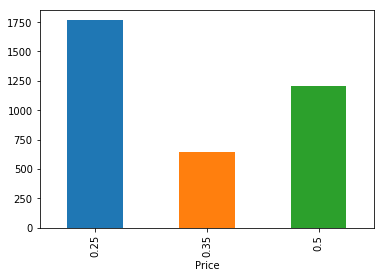

In [162]:
temp2.groupby(['Price'])['Lemon'].sum().plot(kind='bar')

In [163]:
temp2.groupby(['Price'])['Lemon'].mean()

Price
0.25    126.000000
0.35    106.666667
0.50    110.000000
Name: Lemon, dtype: float64

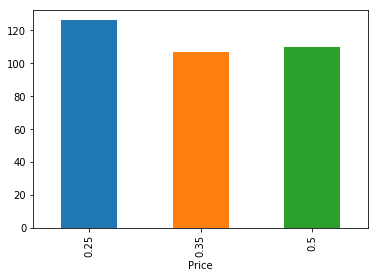

In [164]:
temp2.groupby(['Price'])['Lemon'].mean().plot(kind='bar')

### 실습 P.1 - a

Hypothesis : Price -> Lemon <br>
Comparative type.<br>
가격에 따라, 레몬에이드 판매량이 차이가 있을 것이다.<br>

**여러분은 실습 P.1로 부터, 하나의 가격을 선택하여 팔아보기로 했습니다.**

일단은, 매출은 신경쓰지 않기로 했습니다. 많은 손님에게 알리는 것이 목표니까요.<br>
(물론 싼 가격에 구매하시던 분들이, 나중에 가격을 올릴 때 어떤 반응을 보일지는 고려해야 할 문제입니다.)

**하지만 바로 실험에 들어가기 전에, 한 번 더 체크해야 할 것이 있죠.**

Q0. 어떤 가격으로 팔건가요? 결정해주세요.

Q1. 과거 전체 가격에 대해서 하루 평균 몇 개를 팔았죠? 표준편차는?

Q1.1  1번에서 구한 값으로 다음의 구간을 만드세요. (평균 - 2 * 표준편차,   평균 + 2 * 표준편차 )

Q2. 여러분은 그 중 하나의 가격을 선택하세요. 하루 평균 판매량과 표준편차는?

Q2.1  2번에서 구한 값으로 다음의 구간을 만드세요. (평균 - 2 * 표준편차,   평균 + 2 * 표준편차 )

Q3. 위에서 만든 두 구간을 비교하세요. 어떻게 해야 효과적인 시각화가 가능할까요?
      아래 코드를 참조하세요.

Q4. 1번,2번에 대해서 Boxplot으로 시각화해보세요. 3번과 비교하여 어떤점이 다른가요?

Q5. 실험기간동안 예상 판매량은 어떻죠?

Q5.1 이야기 해봅시다. 실험기간 동안 예상 수익은, 기존 방식대비 얼마나 개선될까요?


In [165]:
l_mean = temp2['Lemon'].mean()

In [166]:
l_std = temp2['Lemon'].std()

In [167]:
l_mean_5d = temp2[temp2['Price']==0.5]['Lemon'].mean()

In [168]:
l_std_5d = temp2[temp2['Price']==0.5]['Lemon'].std()

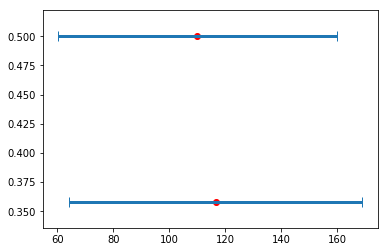

In [169]:
means = np.array([l_mean, l_mean_5d])        # 중심 값. 평균
half_range = np.array([l_std*2, l_std_5d*2])      # 중심으로 부터 거리. 표준편차*2
y_values = np.array([temp2['Price'].mean(), 0.5])  # y축 값. 

plt.scatter(means, y_values, color = 'red')     # 중심 값 추가하기.

# 아래 코드는 그대로 두세요.
plt.errorbar(means, y_values, xerr=half_range, ls='', elinewidth=3, capsize=5)
plt.show()

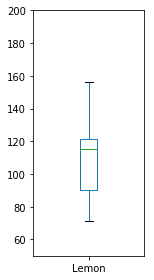

In [172]:
plt.subplot(1,3,3)
temp2.loc[temp2['Price']==.5, 'Lemon'].plot(kind='box', ylim = (50,200))
plt.tight_layout()
plt.show()

### 실습 P.2

Hypothesis : Location -> Lemon <br>
Comparative type.<br>

장소에 따라, 레몬에이드 판매량이 차이가 있을 것이다.<br>

Q1. 장소별 판매량을 조회하시오.

Q2. 1번의 결과를 시각화 해 봅시다.

Q3. 장소별 데이터 양에는 불균형이 있나요?

Q4. 위치의 차이가, 여러분이 의사결정을 하는데 도움을 줄 정도로 큰가요?
    1) 크다면, 크지 않다면 왜 그렇게 판단하셨나요?

Q5. 위치의 차이가 충분히 의미가 있어 보여서, 여러분이 의사 결정을 한다면<br>
    그 것은 정말, 여러분의 '목표'에 있어서 도움되는 방향의 의미가 맞나요?

Q6. 어쨌든, 과거에 있던 사실 중 하나입니다. 이 다음에 무엇을 할 거죠?


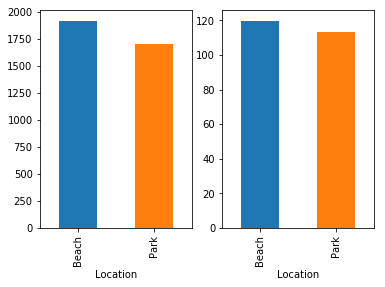

In [175]:
plt.subplot(1,2,1)
temp2.groupby(['Location'])['Lemon'].sum().plot(kind='bar')
plt.subplot(1,2,2)
temp2.groupby(['Location'])['Lemon'].mean().plot(kind='bar')


### 실습 P.2 - a

Hypothesis : Location -> Lemon <br>
Comparative type.<br>
장소에 따라, 레몬에이드 판매량이 차이가 있을 것이다.<br>

**여러분은 실습 P.1로 부터, 하나의 가격을 선택하여 팔아보기로 했습니다.**

'매출'을 신경써야 한다면, 관찰해야 하는 Target(Y, 목표, 관심사)는 무엇이 되어야 할까요?


**하지만 바로 실험에 들어가기 전에, 한 번 더 체크해야 할 것이 있죠.**

Q0. 어디에서 팔건가요? 결정해주세요.

Q1. 과거 전체 지역에 대해서 하루 평균 몇 개를 팔았죠? 표준편차는?

Q1.1  1번에서 구한 값으로 다음의 구간을 만드세요. (평균 - 2 * 표준편차,   평균 + 2 * 표준편차 )

Q2. 여러분은 그 중 하나의 지역을 선택하세요. 하루 평균 판매량과 표준편차는?

Q2.1  2번에서 구한 값으로 다음의 구간을 만드세요. (평균 - 2 * 표준편차,   평균 + 2 * 표준편차 )

Q3. 위에서 만든 두 구간을 비교하세요. 어떻게 해야 효과적인 시각화가 가능할까요?
      아래 코드를 참조하세요.

Q4. 1번,2번에 대해서 Boxplot으로 시각화해보세요. 3번과 비교하여 어떤점이 다른가요?

Q5. 실험기간동안 예상 판매량은 어떻죠?

Q5.1 이야기 해봅시다. 실험기간 동안 예상 수익은, 기존 방식대비 얼마나 개선될까요?


In [136]:
# Beach에서 팔기로 한다

In [137]:
a = temp2['Lemon'].mean()
b = temp2['Lemon'].std()

In [138]:
c = temp2[temp2['Location']=='Beach']['Lemon'].mean()
d = temp2[temp2['Location']=='Beach']['Lemon'].std()

In [139]:
print(a)
print(b)
print(c)
print(d)

116.58064516129032
26.136531513762357
119.8125
25.972341057363312


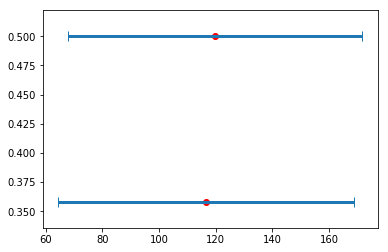

In [140]:
means = np.array([a, c])        # 중심 값. 평균
half_range = np.array([b*2, d*2])      # 중심으로 부터 거리. 표준편차*2
y_values = np.array([temp2['Price'].mean(), 0.5])  # y축 값. 

plt.scatter(means, y_values, color = 'red')     # 중심 값 추가하기.

# 아래 코드는 그대로 두세요.
plt.errorbar(means, y_values, xerr=half_range, ls='', elinewidth=3, capsize=5)
plt.show()

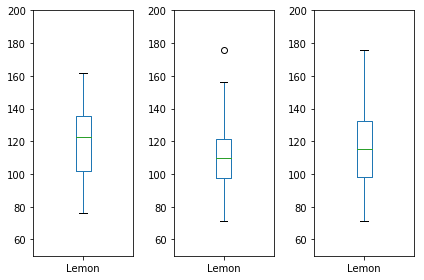

In [180]:
plt.subplot(1,3,1)
temp2.loc[temp2['Location']=='Beach', 'Lemon'].plot(kind='box', ylim = (50,200))
plt.subplot(1,3,2)
temp2.loc[temp2['Location']=='Park', 'Lemon'].plot(kind='box', ylim = (50,200))
plt.subplot(1,3,3)
temp2['Lemon'].plot(kind='box', ylim = (50,200))
plt.tight_layout()
plt.show()

### 실습 P.3

**가설을 조금 더 업그레이드 해봅시다.**
두 가설을 본 여러분은, 조금 더 정교한 선택을 해보고 싶다는 생각이 들었습니다.

Hypothesis : Location, Price -> Lemon <br>
Comparative type.<br>
장소와 가격에 따라, 레몬에이드 판매량이 차이가 있을 것이다.<br>

Q0. 위 가설의 예상된 결과 시나리오를 몇 개 작성해주세요. 그 결과에 따라서 여러분은 뭔가 의사결정이 가능하실까요?

Q1. 장소와 가격이 서로 관련이 없다는 전제하에 다음 문제를 풀어주세요.<br>

    ① 가격에 상관 없이 항상 특정 장소가 잘 팔린다. (참, 거짓)  
    ② 장소에 상관 없이 항상 특정 가격이 잘 팔린다. (참, 거짓)  
    ③ 가격과 장소를 따로 따로 가설을 만들어 선택을 해도, 가격과 장소를 동시에 관찰을 해도 차이가 없다 (참, 거짓)

Q2. 장소와 가격이 서로 관련이 있다면 어떻게 해야 할까요?  (EDA1. C4의 시각화)

Q3. 선택과 의사결정의 문제라면 쉽고 간단한 방법이 있습니다. Location과 Price를 조합한 새로운 변수를 만들어 주세요. (EDA1. C3을 참조하세요.)

Q4. 조합별 데이터 수를 출력하세요.

Q5. 어떤 조합이 평균적으로 몇 개씩 팔았는지 계산하세요.

Q6. 조합들의 표준편차를 계산하세요.

Q7. 각 조합별로  평균 +- 2 * 표준편차 구간을 만들어 주세요.

Q8. 시각화 하여 비교해주세요.

Q9. 앞으로 위에서 만든 평균 +- 2* 표준편차 구간을, 단순히 '변동 구간'이라고 말해보겠습니다.<br>
    과거 31일간의 변동 구간을 구해주세요.
    
Q10. 조합들과, 과거 31일 전체에 대해서 변동구간을 전부 시각화 해주세요. (8번에서 전체를 추가하면 됩니다.)

Q11. 여러분이 어떤 조합을 선택한다면, 그 것은 과거 31일 대비 판매량이 어느정도나 향상 될까요?



In [190]:
temp2.head()

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,dayname,lemon_amt,orange_amt,...,lemon_total_cost,orange_total_cost,net_profit,x_lemon,x_orange,loss_lemon,loss_orange,loss_total,new_factor1,LP
0,2016-07-01,Park,97,67,70,90,0.25,Friday,24.25,16.75,...,10.0,7.5,23.50,103,83,5.15,4.15,9.30,O,Park_0.25
1,2016-07-02,Park,98,67,72,90,0.25,Saturday,24.50,16.75,...,10.0,7.5,23.75,102,83,5.10,4.15,9.25,O,Park_0.25
2,2016-07-03,Park,110,77,71,104,0.25,Sunday,27.50,19.25,...,10.0,7.5,29.25,90,73,4.50,3.65,8.15,O,Park_0.25
3,2016-07-04,Beach,134,99,76,98,0.25,Monday,33.50,24.75,...,10.0,7.5,40.75,66,51,3.30,2.55,5.85,H,Beach_0.25
4,2016-07-05,Beach,159,118,78,135,0.25,Tuesday,39.75,29.50,...,10.0,7.5,51.75,41,32,2.05,1.60,3.65,H,Beach_0.25


In [188]:
temp2['LP'] = temp2['Location'] +'_'+ temp2['Price'].map(str)

In [186]:
temp2.groupby(['LP'])[['Lemon']].count()

,Lemon
LP,
Beach_0.25,11
Beach_0.35,2
Beach_0.5,3
Park_0.25,3
Park_0.35,4
Park_0.5,8


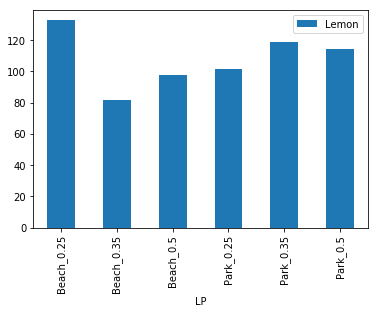

In [189]:
temp2.groupby(['LP'])[['Lemon']].mean().plot(kind='bar')

In [145]:
temp2.groupby(['LP'])[['Lemon']].std()

,Lemon
LP,
Beach_0.25,18.364491
Beach_0.35,8.485281
Beach_0.5,17.000000
Park_0.25,7.234178
Park_0.35,38.140093
Park_0.5,26.763515


In [146]:
temp2.groupby(['LP'])[['Lemon']].mean()+temp2.groupby(['LP'])[['Lemon']].std()*2

,Lemon
LP,
Beach_0.25,169.365346
Beach_0.35,98.970563
Beach_0.5,132.000000
Park_0.25,116.135023
Park_0.35,195.280185
Park_0.5,168.027029


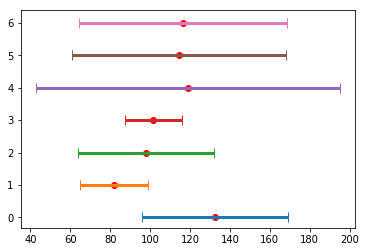

In [147]:
for i in range(len(temp2.groupby(['LP'])[['Lemon']].mean().reset_index()['Lemon'])):
    e=temp2.groupby(['LP'])[['Lemon']].mean().reset_index().loc[i,'Lemon']
    f=temp2.groupby(['LP'])[['Lemon']].std().reset_index().loc[i,'Lemon']


    means = np.array([e])        # 중심 값. 평균
    half_range = np.array([f*2])      # 중심으로 부터 거리. 표준편차*2
    y_values = np.array(i)  # y축 값. 

    plt.scatter(means, y_values, color = 'red')     # 중심 값 추가하기.

    # 아래 코드는 그대로 두세요.
    plt.errorbar(means, y_values, xerr=half_range, ls='', elinewidth=3, capsize=5)

plt.scatter(a, 6, color = 'red')     # 중심 값 추가하기.
plt.errorbar(a, 6, xerr=b*2, ls='', elinewidth=3, capsize=5)

plt.show()

### 실습 P.4

데이터 분석을 하다보면 항상 선택의 기로가 다가옵니다.
1. 정확한 예측값에 따라서 내가 수동적으로 반응해야 한다.
2. 내가 목표를 개선하기 위해 어떤 선택을 먼저 해야 한다.

위의 실습들은 2번에 가까웠죠. 1번에 가까운 것을 한 번 겪어 봅시다.<br>
재고관리를 위해 새로운 방법이나 모델을 도입하는 것이 타당할지 검토해봅시다.


관심사 : 재고 관리<br>
구체화된 관심사 : 폐기 비용 감소,(그로 인한 순이익 증가)


Q1. loss_total(총 폐기 비용)의 평균과 표준편차를 구해보세요.

Q2. 새로운 컬럼을 두 개를 만들어 봅니다. 판매예측양 'lemon_predict' 'orange_predict'
    1) lemon_predict 처음 4일은 lemon_prepared와 똑같이 가져갑니다.
    2) lemon_predict 5일차 부터는 lemon의 과거 4일의평균 + 2 * 과거 4일의 표준편차 로 만들어 둡니다.
    즉, lemon_predict 과거 4일간의 판매량의 평균과 표준편차를 이용하여 만든 일종의 판매예측값입니다. Rolling과 Shift를 이용해서 만듭니다.
    3) orange_predict도 같은 방식으로 만듭니다
    
Q3. 일종의 시뮬레이션을 진행합니다. 'lemon_predict' 'orange_predict'에 따라서 레몬과 오렌지를 구매했다고 가정해봅시다.  
    이 가정대로라면, 재고부족으로  못 판 날도 있을 겁니다.  
    lemon_sim, orange_sim이라는 컬럼을 새로 만듭시다.
    예를 들어, lemon이 180개 팔린 날에, lemon_predict가 170이었다면, lemon_sim은 170이 되어야 합니다.  
    
Q4. lemon_sim, orange_sim, lemon_predict와 orange_predict에 맞추어, net_profit_sim 과 loss_total_sim을 만듭시다.
    원래 net_profit과 원래 loss_total을 구하는 방식대로 구합니다.
    
Q5. n_total 이라는 컬럼을 하나 만듭시다. n_total = Lemon + Orange 즉, 총 판매량입니다.

Q6. n_total_sim 이라는 컬럼을 하나 만듭시다. n_total_sim = lemon_sim + orange_sim 즉, 우리의 새로운 재고관리
방식에 따라 시뮬레이션 했을 때의 가상의 총 판매량입니다.



In [148]:
temp2.head(3)

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,dayname,lemon_amt,orange_amt,...,lemon_total_cost,orange_total_cost,net_profit,x_lemon,x_orange,loss_lemon,loss_orange,loss_total,new_factor1,LP
0,2016-07-01,Park,97,67,70,90,0.25,Friday,24.25,16.75,...,10.0,7.5,23.50,103,83,5.15,4.15,9.30,O,Park_0.25
1,2016-07-02,Park,98,67,72,90,0.25,Saturday,24.50,16.75,...,10.0,7.5,23.75,102,83,5.10,4.15,9.25,O,Park_0.25
2,2016-07-03,Park,110,77,71,104,0.25,Sunday,27.50,19.25,...,10.0,7.5,29.25,90,73,4.50,3.65,8.15,O,Park_0.25


In [149]:
g=temp2['loss_total'].mean()
h=temp2['loss_total'].std()
print(g);print(h)

7.653225806451614
2.4113943229271233


In [150]:
temp2['lemon_predict']=temp2['lemon_prepared']
temp2['lemon_predict']=temp2['Lemon'].rolling(5).mean()
temp2

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,dayname,lemon_amt,orange_amt,...,orange_total_cost,net_profit,x_lemon,x_orange,loss_lemon,loss_orange,loss_total,new_factor1,LP,lemon_predict
0,2016-07-01,Park,97,67,70,90,0.25,Friday,24.25,16.75,...,7.5,23.50,103,83,5.15,4.15,9.30,O,Park_0.25,NaN
1,2016-07-02,Park,98,67,72,90,0.25,Saturday,24.50,16.75,...,7.5,23.75,102,83,5.10,4.15,9.25,O,Park_0.25,NaN
2,2016-07-03,Park,110,77,71,104,0.25,Sunday,27.50,19.25,...,7.5,29.25,90,73,4.50,3.65,8.15,O,Park_0.25,NaN
3,2016-07-04,Beach,134,99,76,98,0.25,Monday,33.50,24.75,...,7.5,40.75,66,51,3.30,2.55,5.85,H,Beach_0.25,NaN
4,2016-07-05,Beach,159,118,78,135,0.25,Tuesday,39.75,29.50,...,7.5,51.75,41,32,2.05,1.60,3.65,H,Beach_0.25,119.6
5,2016-07-06,Beach,103,69,82,90,0.25,Wednesday,25.75,17.25,...,7.5,25.50,97,81,4.85,4.05,8.90,H,Beach_0.25,120.8
6,2016-07-07,Beach,143,101,81,135,0.25,Thursday,35.75,25.25,...,7.5,43.50,57,49,2.85,2.45,5.30,H,Beach_0.25,129.8
7,2016-07-08,Beach,123,86,82,113,0.25,Friday,30.75,21.50,...,7.5,34.75,77,64,3.85,3.20,7.05,H,Beach_0.25,132.4
8,2016-07-09,Beach,134,95,80,126,0.25,Saturday,33.50,23.75,...,7.5,39.75,66,55,3.30,2.75,6.05,H,Beach_0.25,132.4
9,2016-07-10,Beach,140,98,82,131,0.25,Sunday,35.00,24.50,...,7.5,42.00,60,52,3.00,2.60,5.60,H,Beach_0.25,128.6


### 실습 P.4 - 2

관심사 : 재고관리<br>
구체화된 관심사 : 폐기 비용 감소, (그로 인한 순이익 증가)

**가설로 만들어 봅시다. 위에 열심히 만들어둔 예측 모델과 컬럼들은 이런 가설이 선행하고 나서야 하는 작업입니다.**

Hypothesis : 재고관리모델 도입O,X -> total_loss<br>
Comparative type<br>
재고 관리를 하면, 폐기 비용이 줄어들을 것이다. (그로 인해 순이익이 증가할 것이다.)

**사실, 정확히 말하자면, 재고 관리 모델을 도입할만한 가치/가능성 을 따지기 위한 가설입니다.**

Q1. lemon(레몬에이드 판매량)과 lemon_sim(재고관리모델에 의한 레몬에이드 판매량)을 비교하세요.
1. 계산도 해보고, 시각화도 해보세요.
2. 어떤 것이 더 '작을 수 있다면', lemon과 lemon_sim 중, 어떤 것이 그럴까요? 왜 그럴까요?
3. 그 반대의 경우는 없을까요? 현실의 예를 들어 봅시다. 이를 측정하려면 무엇이 필요할까요?

Q2. loss_total과 loss_total_sim을 비교하세요.
1. 변동구간을 제작하여 시각화 하세요.
2. 재고관리를 하면 그러기 전에 비하여 얼마나 더 개선/악화가 되나요?

Q3. net_profit과 net_profit_sim을 비교하세요.
1. 변동구간을 제작하여 시각화 하세요.
2. 재고관리를 하면 그러기 전에 비하여 얼마나 더 개선/악화가 되나요?
3. 재고관리 모델에 의하여 '놓친'비용을 계산하세요.
4. 그 반대의 경우는 없을까요? Q1번의 3번을 다시 고민합시다.

Q4. loss_total과 loss_total_sim을 '날짜'에 따라 관찰해보려고 합니다. 시각화 해보세요.
1. 날짜에 따른 판매량을 같이 봐야할 수도 있습니다.
2. 주로 어디에서 재고 관리 모델이 잘 동작했나요? 왜 그럴까요?
3. 주로 어디에서 재고 관리 모델이 망가졌나요? 왜 그럴까요?

**이러한 종류의 가설이 정교해지기 시작하면 그 때부터 Machine Learning 을 고민해야 합니다.**

### 실습 P.5

다시 가벼운 것으로 돌아옵시다.

요일에 따른 총 매출을 비교해보고 싶습니다. 아래를 채워주세요.

Hypothesis : (            ) -> (           )<br>
(               ) type<br>
요일에 따라서, 판매량이 다를 것이다.


Q1. 요일별로 데이터가 몇 개씩이나 있나요?


Q1.2 요일이 만약 부족하다면, 대략 요일별로 데이터가 몇 개는 있어야 할까요?


Q3. 요일별 총 매출을 비교해봅시다.
1. 변동구간을 사용하지 마세요.
2. 바로 간단히 관찰가능한 시각화 방법을 이용하세요.

Q4. 요일별로, location이나 Price가 잘 흩어져 있나요?<br>
예를 들면, 월요일에는 0.35로만 팔진 않았나요?

Q4.1 요일에 대한 적절한 분석이 가능할까요?

Q5. 요일이 중요하다고 가정합시다. 요일에 따라 매출 혹은 판매량이 다르단 것은 무슨 도움이 될까요?<br>
구체적으로 '무엇/관심사/목표/Y'를 위해 필요한 정보가 될 것인지 말해봅시다.

In [193]:
temp2.head()

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,dayname,lemon_amt,orange_amt,...,lemon_total_cost,orange_total_cost,net_profit,x_lemon,x_orange,loss_lemon,loss_orange,loss_total,new_factor1,LP
0,2016-07-01,Park,97,67,70,90,0.25,Friday,24.25,16.75,...,10.0,7.5,23.50,103,83,5.15,4.15,9.30,O,Park_0.25
1,2016-07-02,Park,98,67,72,90,0.25,Saturday,24.50,16.75,...,10.0,7.5,23.75,102,83,5.10,4.15,9.25,O,Park_0.25
2,2016-07-03,Park,110,77,71,104,0.25,Sunday,27.50,19.25,...,10.0,7.5,29.25,90,73,4.50,3.65,8.15,O,Park_0.25
3,2016-07-04,Beach,134,99,76,98,0.25,Monday,33.50,24.75,...,10.0,7.5,40.75,66,51,3.30,2.55,5.85,H,Beach_0.25
4,2016-07-05,Beach,159,118,78,135,0.25,Tuesday,39.75,29.50,...,10.0,7.5,51.75,41,32,2.05,1.60,3.65,H,Beach_0.25


In [194]:
temp2.groupby(['dayname'])['dayname'].count()

dayname
Friday       5
Monday       4
Saturday     5
Sunday       5
Thursday     4
Tuesday      4
Wednesday    4
Name: dayname, dtype: int64

In [205]:
temp2['dayname'].unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

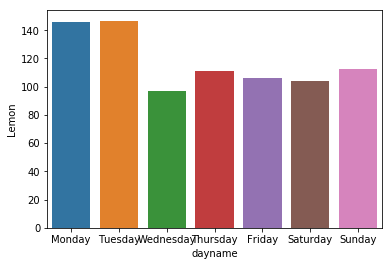

In [218]:
a = temp2.groupby(['dayname'], as_index=False)[['Lemon']].mean()
figure(size = )
sns.barplot(x = 'dayname', y = 'Lemon', data =a, order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [219]:
temp2.groupby(['dayname'])[['Lemon']].mean()

,Lemon
dayname,
Friday,106.00
Monday,145.75
Saturday,104.20
Sunday,112.40
Thursday,111.00
Tuesday,146.75
Wednesday,96.75


### 실습 P.6

Hypothesis : Leaflet -> Lemon(Orange)<br>
Associative Type<br>
리플렛에 따라서 레몬에이드(오렌지에이드) 판매량이 변화할 것이다.


**이 가설에 대해서 다시 점검해 봅시다.**

가정
1. Leaflet은 아침에 뿌리고, 장사는 11시 부터 시작한다고 가정합니다.
2. 내일 장사에 필요한 레몬,오렌지는 오늘 저녁에 주문을 넣어야 합니다.
3. 여러분은 이 가설이 참이냐 거짓이냐에 따라서 이후 어떻게 가설을 정교화 하고, 행동할지 계획되어 있어야 합니다.


Q1. 이를 가장 효과적으로 관찰하기 좋은 시각화 방법은 무엇일까요? 시각화 해보세요.

Q2. Leaflet의 수가 변화할 때, 판매량의 변화가 여러분에게 '의미가 있는' 변화인가요?

Q3. 약 20일간 실험을 진행해보기로 했습니다. Leaflet을 더 열심히 뿌리기로 했습니다.
1. '열심히'라는 의도가 있기 전 후, Leaflet 배포 수에 차이가 있는지 봐야 한다. (O, X)
2. '열심히'라는 의도가 반영 된 후, Leaflet에 의한 판매량 변화 패턴이 유지되는지 확인해야 한다. (O, X)
3. '열심히'라는 의도가 반영 된 후, 패턴이 언제까지 유지 되는지 지표로 만들어 관리해야 한다. (O, X)
3. 이를 바탕으로 재고관리 모델을 만들 수 있다. (O, X)
    * O 라면, 왜?
    * X 라면, 왜?
    
Q4. 다른 Categorical Data를 이용하여 분리 해 봅시다.
1. Price나 Location을 이용해 이 가설을 관찰하려면 어떻게 해야 할까요? 시각화 해봅시다.

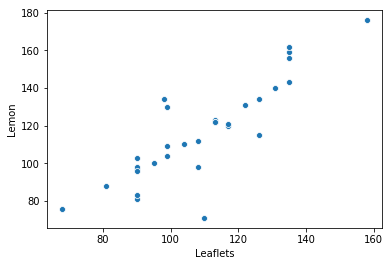

In [228]:
sns.scatterplot(data = temp2, x = 'Leaflets', y = 'Lemon')

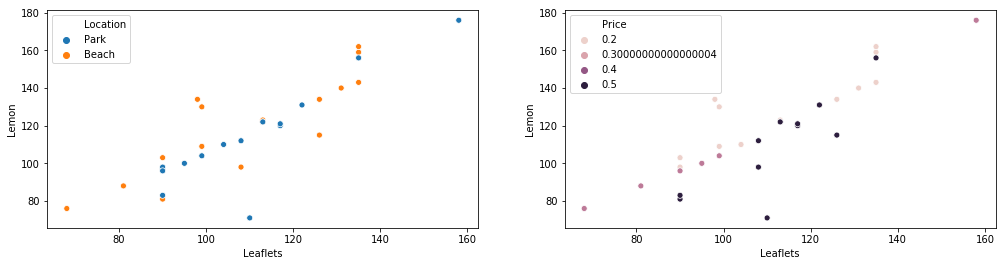

In [234]:
plt.figure(figsize=(17,4))
plt.subplot(1,2,1)
sns.scatterplot(data = temp2, x = 'Leaflets', y = 'Lemon', hue='Location')
plt.subplot(1,2,2)
sns.scatterplot(data = temp2, x = 'Leaflets', y = 'Lemon', hue = 'Price')

### 실습 P.7

Leaflet을 이용하여 재고 관리를 하는데 도움이 되는지 알고 싶습니다.

조건은 다음과 같습니다.
1. 당일 아침에 뿌린 Leaflet이 판매량에 영향을 준다는 것을 확인했습니다.
    * 그리고 실험해봤습니다. 열심히 뿌려봤어요. 한 20일간.
    * 그랬더니 열심히 뿌리면 확실히 당일 판매량이 증가 합니다.
2. 레몬과 오렌지 주문은 장사 전 날에 미리 해야 합니다. 즉, 내일의 판매량 예측은 오늘까지의 데이터로 해야 합니다.

Hypotheis : Leaflet(과거) -> Lemon<br>
Associative Type<br>
과거에 뿌린 리플렛이 내일의 레몬 판매량에 영향을 줄 것이다.

Q1. 위 가설의 한계를 구체적으로 서술하시오.
* 힌트1 : 예측 시점에 의한 한계

Q2. 만일 위 가설이 '판매량이 아닌 매출에 영향을 준다'라면, 결과에 따라 어떤 의미를 줄까요?

Q3. 구체화 해봅시다. 컬럼을 준비합시다
1. leaflet_lag1 이라는 어제 뿌린 leaflet 컬럼을 만듭시다.
2. leaflet_lag2 라는 2일 전에 뿌린 leaflet 컬럼을 만듭시다.
3. leaflet_lag5 까지 만들어 봅시다.
4. 여러분 생각에, 몇 까지 만들어야 할 것 같나요? 이유를 들어 말해봅시다.

Q4. 조금 더 Feature Engineering 해봐도 좋습니다. leaflet_lag1~lag2의 최대값이라든지. 두개 정도 더 만들어봅시다.
1. 만든 것 1 기록
2. 만든 것 2 기록


Q5. 시각화 해보고, 의견을 나누어 봅시다. 이는 판매량 예측 모델을 만드는데 도움이 될까요?
* 된다면, 왜 그럴까요
* 안된다면, 왜 그럴까요

### 실습 P.8

Hypothesis : new_factor1 -> Lemon(Orange)<br>
Comparative Type<br>
Park에서 0.5 미만으로 판매 하면, 판매량이 늘어날 것이다.

Q1. 무엇을 해야 할까요? 코드를 짭시다.

Q2. 의미있는 차이일까요?

Q3. 이것이 과거 사실로 확인된다면, 무엇을 해볼 수 있을까요?

Q4. 사실 원하는게 총 매출 향상이라면, 올바른 가설일까요?

Q5. 이 가설은, 어떤 다른 가설안에 흡수되어 버리는 가설입니다. (일부가 됩니다.) 무엇일까요?

### 실습 P. On your Own

하지 않은 것이 엄청 많습니다.

온도뿐 아니라, 여러분만의 가설에 의해 새로 만들어진 변수들도 많이 있을 겁니다.

**전부 해봅시다.**

In [238]:
pd.set_option('display.max_columns', None)
temp2.head()

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,dayname,lemon_amt,orange_amt,total_amt,temper_group,operation_cost,unit_cost,lemon_prepared,orange_prepared,lemon_total_cost,orange_total_cost,net_profit,x_lemon,x_orange,loss_lemon,loss_orange,loss_total,new_factor1,LP
0,2016-07-01,Park,97,67,70,90,0.25,Friday,24.25,16.75,41.00,L,5,0.05,200,150,10.0,7.5,23.50,103,83,5.15,4.15,9.30,O,Park_0.25
1,2016-07-02,Park,98,67,72,90,0.25,Saturday,24.50,16.75,41.25,L,5,0.05,200,150,10.0,7.5,23.75,102,83,5.10,4.15,9.25,O,Park_0.25
2,2016-07-03,Park,110,77,71,104,0.25,Sunday,27.50,19.25,46.75,L,5,0.05,200,150,10.0,7.5,29.25,90,73,4.50,3.65,8.15,O,Park_0.25
3,2016-07-04,Beach,134,99,76,98,0.25,Monday,33.50,24.75,58.25,L,5,0.05,200,150,10.0,7.5,40.75,66,51,3.30,2.55,5.85,H,Beach_0.25
4,2016-07-05,Beach,159,118,78,135,0.25,Tuesday,39.75,29.50,69.25,M,5,0.05,200,150,10.0,7.5,51.75,41,32,2.05,1.60,3.65,H,Beach_0.25


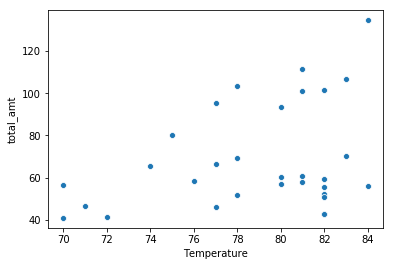

In [244]:
sns.scatterplot(data= temp2, x = 'Temperature', y = 'total_amt')

### 실습 P.Last

결과를 전부 정리합시다.

1. 준비한 가설 리스트들이 어떻게 확인되었고, 어떤 가설들을 만들어 어떻게 확인했나요
2. 각 가설들의 결과가 어땠고, 이후 계획을 작성하셔야 합니다.

다시 한 번!

**끝이 아닙니다.**